# Importing Data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("life_expectancy.csv")
#This dataset was created by the World Health Organization and can be found at https://www.kaggle.com/kumarajarshi/life-expectancy-who.

In [3]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

In [4]:
dataset.drop(["Country", "Year"], axis=1, inplace=True)
#These two columns vary too much and don't provide much useful information.

In [5]:
dataset.dropna(inplace=True)

In [6]:
labels = dataset["Life expectancy "]

In [7]:
features = dataset.iloc[:, dataset.columns != "Life expectancy "]

In [8]:
features = pd.get_dummies(features)
#Converting categorical variables into quantitative variables

In [9]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_columns = features.select_dtypes(include=["float64", "int64"]).columns
ct = ColumnTransformer(
  [("num_only", StandardScaler(), numeric_columns)],
    remainder="passthrough"
  )

In [11]:
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

# Building and Training Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
num_columns = len(features.columns)
model.add(layers.InputLayer(input_shape = len(features.columns)))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [13]:
from tensorflow.keras.optimizers import Adam

opt = Adam()
model.compile(loss="mse",
              optimizer=opt,
              metrics=["mae"])

In [14]:
history = model.fit(features_train_scaled, labels_train, epochs=250, batch_size=5, verbose=1, validation_split = .2)

Epoch 1/250
211/211 [==============================] - 1s 4ms/step - loss: 3108.8340 - mae: 54.8097 - val_loss: 2333.0632 - val_mae: 47.5464
Epoch 2/250
211/211 [==============================] - 1s 3ms/step - loss: 1728.1757 - mae: 40.4034 - val_loss: 1269.0905 - val_mae: 34.5931
Epoch 3/250
211/211 [==============================] - 1s 3ms/step - loss: 910.0458 - mae: 28.5938 - val_loss: 643.1282 - val_mae: 23.9013
Epoch 4/250
211/211 [==============================] - 1s 3ms/step - loss: 448.3784 - mae: 19.3017 - val_loss: 313.1417 - val_mae: 16.0857
Epoch 5/250
211/211 [==============================] - 1s 3ms/step - loss: 225.5629 - mae: 13.2171 - val_loss: 164.1207 - val_mae: 11.4601
Epoch 6/250
211/211 [==============================] - 1s 3ms/step - loss: 130.0304 - mae: 9.8875 - val_loss: 102.6470 - val_mae: 8.8277
Epoch 7/250
211/211 [==============================] - 1s 3ms/step - loss: 94.9392 - mae: 8.2068 - val_loss: 81.9382 - val_mae: 7.6416
Epoch 8/250
211/211 [========

211/211 [==============================] - 0s 2ms/step - loss: 9.3799 - mae: 2.3318 - val_loss: 9.3678 - val_mae: 2.3671
Epoch 62/250
211/211 [==============================] - 0s 2ms/step - loss: 8.9569 - mae: 2.2625 - val_loss: 8.8940 - val_mae: 2.2618
Epoch 63/250
211/211 [==============================] - 0s 2ms/step - loss: 9.3329 - mae: 2.3537 - val_loss: 9.2105 - val_mae: 2.3045
Epoch 64/250
211/211 [==============================] - 0s 2ms/step - loss: 8.7722 - mae: 2.2447 - val_loss: 9.1935 - val_mae: 2.3170
Epoch 65/250
211/211 [==============================] - 0s 2ms/step - loss: 8.6572 - mae: 2.2303 - val_loss: 8.5921 - val_mae: 2.2175
Epoch 66/250
211/211 [==============================] - 0s 2ms/step - loss: 8.8676 - mae: 2.2394 - val_loss: 9.0851 - val_mae: 2.3036
Epoch 67/250
211/211 [==============================] - 0s 2ms/step - loss: 8.9462 - mae: 2.2983 - val_loss: 8.8056 - val_mae: 2.2804
Epoch 68/250
211/211 [==============================] - 0s 2ms/step - loss:

211/211 [==============================] - 0s 2ms/step - loss: 4.3111 - mae: 1.5062 - val_loss: 4.6008 - val_mae: 1.5428
Epoch 123/250
211/211 [==============================] - 0s 2ms/step - loss: 4.2871 - mae: 1.4998 - val_loss: 4.4590 - val_mae: 1.5050
Epoch 124/250
211/211 [==============================] - 0s 2ms/step - loss: 4.2783 - mae: 1.5045 - val_loss: 4.6546 - val_mae: 1.5410
Epoch 125/250
211/211 [==============================] - 0s 2ms/step - loss: 3.9564 - mae: 1.4283 - val_loss: 4.7199 - val_mae: 1.5513
Epoch 126/250
211/211 [==============================] - 0s 2ms/step - loss: 4.1686 - mae: 1.4705 - val_loss: 4.5934 - val_mae: 1.4873
Epoch 127/250
211/211 [==============================] - 0s 2ms/step - loss: 4.4540 - mae: 1.5219 - val_loss: 4.8626 - val_mae: 1.5976
Epoch 128/250
211/211 [==============================] - 0s 2ms/step - loss: 4.0795 - mae: 1.4604 - val_loss: 4.7708 - val_mae: 1.5128
Epoch 129/250
211/211 [==============================] - 0s 2ms/step 

Epoch 183/250
211/211 [==============================] - 0s 2ms/step - loss: 3.3458 - mae: 1.2940 - val_loss: 3.6193 - val_mae: 1.3409
Epoch 184/250
211/211 [==============================] - 0s 2ms/step - loss: 2.9806 - mae: 1.2311 - val_loss: 3.6881 - val_mae: 1.3218
Epoch 185/250
211/211 [==============================] - 0s 2ms/step - loss: 3.3133 - mae: 1.2982 - val_loss: 3.5399 - val_mae: 1.2992
Epoch 186/250
211/211 [==============================] - 0s 2ms/step - loss: 3.1100 - mae: 1.2583 - val_loss: 3.5674 - val_mae: 1.3370
Epoch 187/250
211/211 [==============================] - 0s 2ms/step - loss: 2.9135 - mae: 1.2117 - val_loss: 3.9000 - val_mae: 1.4121
Epoch 188/250
211/211 [==============================] - 0s 2ms/step - loss: 3.0117 - mae: 1.2204 - val_loss: 3.9047 - val_mae: 1.3952
Epoch 189/250
211/211 [==============================] - 1s 3ms/step - loss: 3.1898 - mae: 1.2657 - val_loss: 3.9436 - val_mae: 1.3806
Epoch 190/250
211/211 [==============================] 

211/211 [==============================] - 0s 2ms/step - loss: 2.5615 - mae: 1.1087 - val_loss: 3.4642 - val_mae: 1.2932
Epoch 244/250
211/211 [==============================] - 0s 2ms/step - loss: 2.5421 - mae: 1.1141 - val_loss: 3.7885 - val_mae: 1.4129
Epoch 245/250
211/211 [==============================] - 0s 2ms/step - loss: 2.6199 - mae: 1.1177 - val_loss: 3.4776 - val_mae: 1.3052
Epoch 246/250
211/211 [==============================] - 0s 2ms/step - loss: 2.6336 - mae: 1.0982 - val_loss: 3.4931 - val_mae: 1.3432
Epoch 247/250
211/211 [==============================] - 0s 2ms/step - loss: 2.4353 - mae: 1.0951 - val_loss: 3.5519 - val_mae: 1.3361
Epoch 248/250
211/211 [==============================] - 0s 2ms/step - loss: 2.4278 - mae: 1.0692 - val_loss: 3.3159 - val_mae: 1.2839
Epoch 249/250
211/211 [==============================] - 0s 2ms/step - loss: 2.3597 - mae: 1.0622 - val_loss: 3.5315 - val_mae: 1.3113
Epoch 250/250
211/211 [==============================] - 0s 2ms/step 

# Hyperparameter Tuning

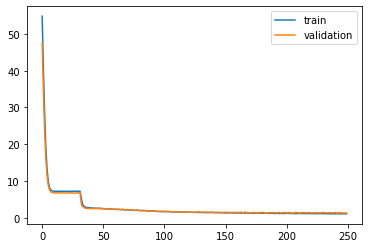

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='validation')
plt.legend(loc="upper right")

plt.show()

# Results

In [16]:
res_mse, res_mae = model.evaluate(features_test_scaled, labels_test, verbose=0)

In [17]:
print(res_mae)

1.4911599159240723
